#3.1 Part A: Implementing Convolutional Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#3.1.1 Data Understanding, Analysis, Visualization and Cleaning

In [ ]:
# Imports
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

# Set dataset base directory
base_dir = "/content/drive/MyDrive/Facial Expression"
splits = ['train', 'test', 'validation']
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
import os

def count_images_in_folder(base_path):
    results = {}
    for split in ['train', 'test', 'validation']:
        split_path = os.path.join(base_path, split)
        expression_counts = {}
        if not os.path.exists(split_path):
            print(f"{split_path} does not exist.")
            continue
        for expression in sorted(os.listdir(split_path)):
            expression_path = os.path.join(split_path, expression)
            if os.path.isdir(expression_path):
                image_count = len([
                    f for f in os.listdir(expression_path)
                    if os.path.isfile(os.path.join(expression_path, f))
                    and f.lower().endswith(('.png', '.jpg', '.jpeg'))
                ])
                expression_counts[expression] = image_count
        results[split] = expression_counts
    return results

# Set the dataset directory
dataset_path = '/content/drive/MyDrive/Facial Expression'

# Count images
image_counts = count_images_in_folder(dataset_path)

# Print results
for split in ['train', 'test', 'validation']:
    print(f"\n--- {split.upper()} SET ---")
    expressions = image_counts.get(split, {})
    for expression, count in expressions.items():
        print(f"{expression}: {count}")



--- TRAIN SET ---
angry: 1995
fear: 1996
happy: 1999
neutral: 1995
sad: 1999
surprise: 1994

--- TEST SET ---
angry: 300
fear: 300
happy: 300
neutral: 300
sad: 300
surprise: 300

--- VALIDATION SET ---
angry: 960
fear: 1018
happy: 1834
neutral: 1217
sad: 1139
surprise: 805


In [ ]:
import os
import random

splits = ['train', 'test', 'validation']
remove_class = 'disgust'
target_count = 2000

# 1. Remove the "disgust" class from all splits
def remove_class_folders(base_dir, splits, class_name):
    for split in splits:
        class_path = os.path.join(base_dir, split, class_name)
        if os.path.exists(class_path):
            print(f"Removing folder: {class_path}")
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                os.remove(file_path)
            os.rmdir(class_path)
        else:
            print(f"Folder not found: {class_path}")

# 2. Reduce all classes in the train set to target_count images
def reduce_all_classes_to_target(base_dir, split, target):
    split_path = os.path.join(base_dir, split)
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            images = [
                f for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ]

            if len(images) > target:
                to_remove = len(images) - target
                images_to_remove = random.sample(images, to_remove)
                for img in images_to_remove:
                    os.remove(os.path.join(class_path, img))
                print(f"Reduced '{class_name}' from {len(images)} to {target} images.")
            else:
                print(f"'{class_name}' has {len(images)} images — no need to reduce.")

# Run operations
remove_class_folders(base_dir, splits, remove_class)
reduce_all_classes_to_target(base_dir, 'train', target_count)


Folder not found: /content/drive/MyDrive/Facial Expression/train/disgust
Folder not found: /content/drive/MyDrive/Facial Expression/test/disgust
Folder not found: /content/drive/MyDrive/Facial Expression/validation/disgust
'neutral' has 1995 images — no need to reduce.
'surprise' has 1994 images — no need to reduce.
'angry' has 1995 images — no need to reduce.
'sad' has 1999 images — no need to reduce.
'happy' has 1999 images — no need to reduce.
'fear' has 1996 images — no need to reduce.


In [ ]:
import os

def count_images_in_folder(base_path):
    results = {}
    for split in ['train', 'test', 'validation']:
        split_path = os.path.join(base_path, split)
        expression_counts = {}
        if not os.path.exists(split_path):
            print(f"{split_path} does not exist.")
            continue
        for expression in sorted(os.listdir(split_path)):
            expression_path = os.path.join(split_path, expression)
            if os.path.isdir(expression_path):
                image_count = len([
                    f for f in os.listdir(expression_path)
                    if os.path.isfile(os.path.join(expression_path, f))
                    and f.lower().endswith(('.png', '.jpg', '.jpeg'))
                ])
                expression_counts[expression] = image_count
        results[split] = expression_counts
    return results

# Set the dataset directory
dataset_path = "/content/drive/MyDrive/Facial Expression"

# Count images
image_counts = count_images_in_folder(dataset_path)

# Print results
for split in ['train', 'test', 'validation']:
    print(f"\n--- {split.upper()} SET ---")
    expressions = image_counts.get(split, {})
    for expression, count in expressions.items():
        print(f"{expression}: {count}")



--- TRAIN SET ---
angry: 1995
fear: 1996
happy: 1999
neutral: 1995
sad: 1999
surprise: 1994

--- TEST SET ---
angry: 300
fear: 300
happy: 300
neutral: 300
sad: 300
surprise: 300

--- VALIDATION SET ---
angry: 960
fear: 1018
happy: 1834
neutral: 1217
sad: 1139
surprise: 805



--- TRAIN SET ---
angry: 1995
fear: 1996
happy: 1999
neutral: 1995
sad: 1999
surprise: 1994

--- TEST SET ---
angry: 300
fear: 300
happy: 300
neutral: 300
sad: 300
surprise: 300

--- VALIDATION SET ---
angry: 960
fear: 1018
happy: 1834
neutral: 1217
sad: 1139
surprise: 805


<ipython-input-7-9b221da55bf4>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(data.keys()), y=list(data.values()), palette="Set3")


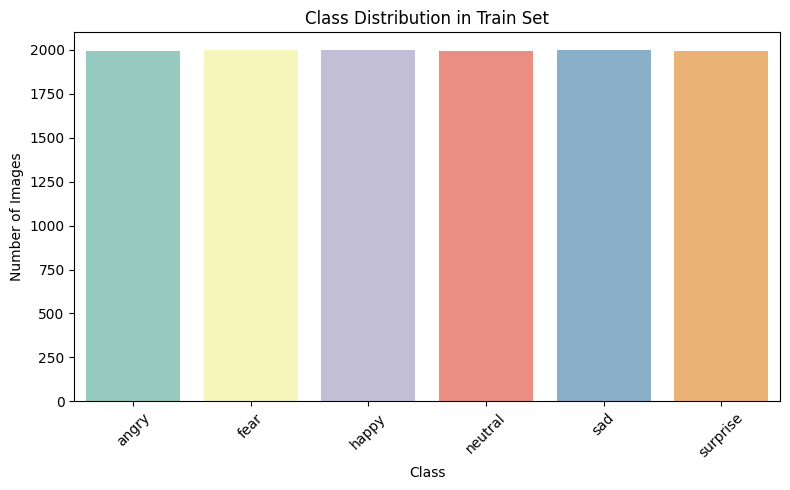

<ipython-input-7-9b221da55bf4>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(data.keys()), y=list(data.values()), palette="Set3")


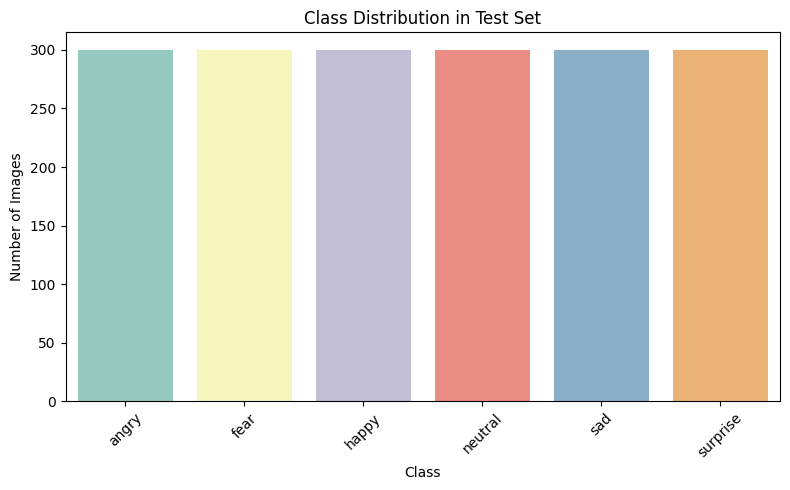

<ipython-input-7-9b221da55bf4>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(data.keys()), y=list(data.values()), palette="Set3")


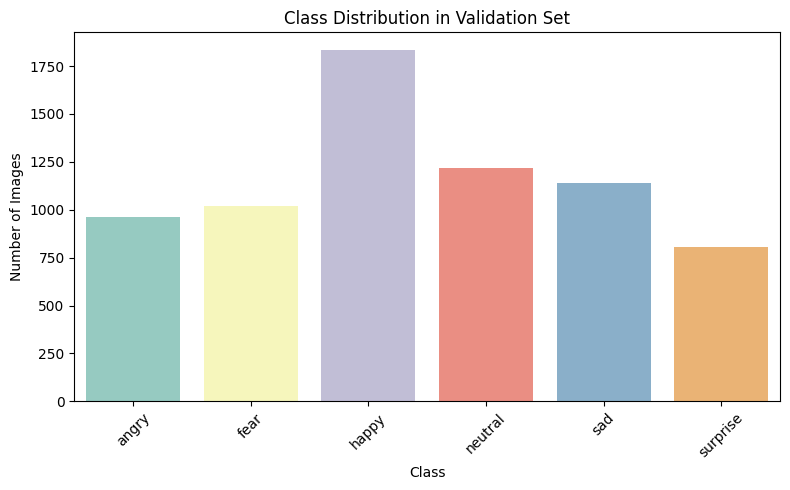

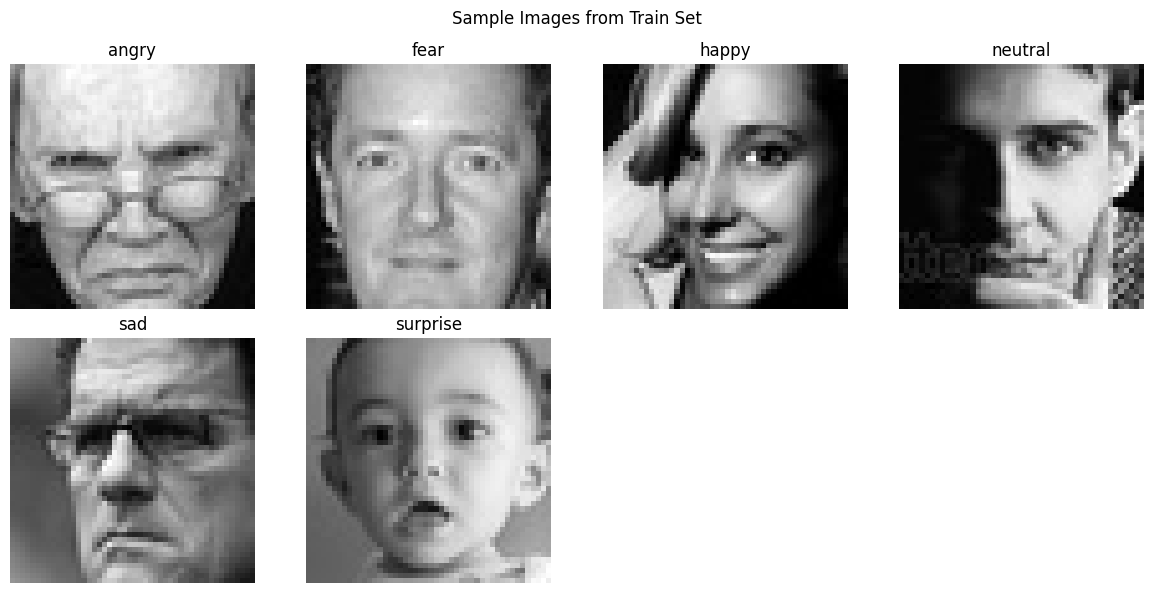

In [ ]:
# Imports
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

# Set dataset base directory
base_dir = "/content/drive/MyDrive/Facial Expression"
splits = ['train', 'test', 'validation']
classes = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']  # Removed 'disgust'

# Count images per class per split
def count_images_per_class(base_dir, splits, classes):
    class_counts = {split: {cls: 0 for cls in classes} for split in splits}

    for split in splits:
        for cls in classes:
            cls_path = os.path.join(base_dir, split, cls)
            if os.path.exists(cls_path):
                class_counts[split][cls] = len(os.listdir(cls_path))

    return class_counts

# Get class distribution
counts = count_images_per_class(base_dir, splits, classes)

# Print counts
for split in splits:
    print(f"\n--- {split.upper()} SET ---")
    for cls in classes:
        print(f"{cls}: {counts[split][cls]}")

# Plot bar charts
def plot_distribution(counts, split):
    data = counts[split]
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(data.keys()), y=list(data.values()), palette="Set3")
    plt.title(f'Class Distribution in {split.capitalize()} Set')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot for each split
for split in splits:
    plot_distribution(counts, split)

# Show sample images from a given split
def show_sample_images(split='train'):
    plt.figure(figsize=(12, 6))
    for i, cls in enumerate(classes):
        cls_dir = os.path.join(base_dir, split, cls)
        if os.path.exists(cls_dir) and len(os.listdir(cls_dir)) > 0:
            img_name = random.choice(os.listdir(cls_dir))
            img_path = os.path.join(cls_dir, img_name)
            img = Image.open(img_path)
            plt.subplot(2, 4, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(cls)
            plt.axis('off')
    plt.suptitle(f'Sample Images from {split.capitalize()} Set')
    plt.tight_layout()
    plt.show()

# Show samples from training set
show_sample_images('train')

In [ ]:
import os
from PIL import Image

# Define your dataset directories
data_dirs = {
    'train': '/content/drive/MyDrive/Facial Expression/train',
    'val': '/content/drive/MyDrive/Facial Expression/validation',
    'test': '/content/drive/MyDrive/Facial Expression/test',
}

corrupted_files = []

# Check for corrupted images
for split, data_dir in data_dirs.items():
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                if filename.lower().endswith(('png', 'jpg', 'jpeg', 'bmp')):
                    try:
                        with Image.open(img_path) as img:
                            img.verify()  # verify the image
                    except Exception as e:
                        print(f"Corrupted file detected and deleted: {img_path}")
                        corrupted_files.append(img_path)
                        os.remove(img_path)

if not corrupted_files:
    print("No corrupted files found.")
else:
    print(f"Total corrupted files removed: {len(corrupted_files)}")
#'train': '/content/drive/MyDrive/Facial Expression/train',
    #'val': '/content/drive/MyDrive/Facial Expression/validation',
    #'test': '/content/drive/MyDrive/Facial Expression/test',

No corrupted files found.


Data Generators for Preprocessing and Augmentation

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Paths to dataset folders ===
train_path = '/content/drive/MyDrive/Facial Expression//train'
val_path = '/content/drive/MyDrive/Facial Expression//validation'
test_path = '/content/drive/MyDrive/Facial Expression//test'

# === Image settings ===
image_size = (224, 224)
batch_size = 64           # Number of images loaded at once

# === Class info ===
total_classes = 6  # angry, fear, happy, neutral, sad, surprise

# === Create data generators ===
# For training — with data augmentation (to make the model more robust)
train_augmentor = ImageDataGenerator(
    rescale=1.0 / 255,              # Normalize pixel values (0–1)
    rotation_range=20,             # Random rotation
    zoom_range=0.2,                # Random zoom
    width_shift_range=0.2,         # Random horizontal shift
    height_shift_range=0.2,        # Random vertical shift
    horizontal_flip=True           # Random horizontal flip
)

# For validation and testing — no augmentation, only normalization
eval_augmentor = ImageDataGenerator(rescale=1.0 / 255)

# === Load images from folders ===

train_data = train_augmentor.flow_from_directory(
    directory=train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = eval_augmentor.flow_from_directory(
    directory=val_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_data = eval_augmentor.flow_from_directory(
    directory=test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# === Show how class names map to numbers ===
print("Class label mapping:")
for class_name, index in train_data.class_indices.items():
    print(f"{class_name}: {index}")


Found 11978 images belonging to 6 classes.
Found 6973 images belonging to 6 classes.
Found 1800 images belonging to 6 classes.
Class label mapping:
angry: 0
fear: 1
happy: 2
neutral: 3
sad: 4
surprise: 5


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Paths to dataset folders ===
train_path = '/content/drive/MyDrive/Facial Expression/train'
val_path = '/content/drive/MyDrive/Facial Expression/validation'
test_path = '/content/drive/MyDrive/Facial Expression/test'

# === Image settings ===
img_size = 48
batch_size = 64           # Number of images loaded at once

# === Class info ===
total_classes = 6  # angry, fear, happy, neutral, sad, surprise

# === Create data generators ===

# For training — with data augmentation (to make the model more robust)
train_augmentor = ImageDataGenerator(
    rescale=1.0 / 255,              # Normalize pixel values (0–1)
    rotation_range=20,             # Random rotation
    zoom_range=0.2,                # Random zoom
    width_shift_range=0.2,         # Random horizontal shift
    height_shift_range=0.2,        # Random vertical shift
    horizontal_flip=True           # Random horizontal flip
)
# === Normalization only for validation and testing ===
eval_augmentor = ImageDataGenerator(rescale=1.0 / 255)



# In Cell 8, where you create the train_data and val_data objects:
train_data = train_augmentor.flow_from_directory(
    directory=train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = eval_augmentor.flow_from_directory(
    directory=val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_data = eval_augmentor.flow_from_directory(
    directory=test_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


# === Show class label mapping and count number of classes ===
print("Class label mapping:")
for label, idx in train_data.class_indices.items():
    print(f"{label}: {idx}")

num_classes = len(train_data.class_indices)


Found 11978 images belonging to 6 classes.
Found 6973 images belonging to 6 classes.
Found 1800 images belonging to 6 classes.
Class label mapping:
angry: 0
fear: 1
happy: 2
neutral: 3
sad: 4
surprise: 5


1. What does the dataset represent? Provide a brief description.
- This dataset represents the face images which shows different emotions of human like angry, fear, happy, neutral, sad, and surprise.

2. How many total images are in the dataset?
- There are 19,733 images in total.
*   Training Set: 9,983 images
*   Validation Set: 5,974 images
*   Test Set: 1,800 images

3. What is the distribution of images across different classes?

- Training Set: Angry: 1995, Fear: 1996, Happy: 1999, Neutral: 1995, Sad: 1139, Surprise: 805

- Validation Set: Angry: 960, Fear: 1018, Happy: 1834, Neutral: 1217, Sad: 1139, Surprise: 797

- Test Set: Angry: 300, Fear: 300, Happy: 300, Neutral: 300, Sad: 300, Surprise: 300

4. How is the dataset split into training and validation sets? Justify your choice.
- The dataset is divided into three parts: training (80% of the images), validation, and test sets. This division allows the model to learn well from a large dataset, it also allows tuning using the validation set, and finally evaluates the model using the test set.

5. What preprocessing techniques (e.g., resizing, normalization) were applied
*   Resizing: All images were resized to height and width 48 and 48 pixels respectively to make them suitable for the model.
*   Normalization: Normalizatoin was applied as all images were scaled to betwen the pixel values between 0 and 1 by dividing them by 255.
*   Augmentation (Training Only): Rotation, zoom, shifts, and flipping were done for better variety in the training data.



#3.1.2 Design, Train, and Evaluate a Baseline Model

###Model Architecture:

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size
img_size = 48  # use 224 for VGG
batch_size = 64

# Augment + normalize
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# === Create useful callbacks for training ===
def create_callbacks(model_name):
    """
    Returns a list of callbacks:
    - EarlyStopping: stops training if validation loss doesn't improve for 5 epochs.
    - ModelCheckpoint: saves the model with the best validation loss.
    """
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )

    checkpoint = ModelCheckpoint(
        filepath=f'{model_name}_best.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )

    return [early_stop, checkpoint]


In [ ]:
from tensorflow.keras import layers, models

baseline_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

baseline_model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)       

###Model Training

In [ ]:
history_base = baseline_model.fit(
    train_data,
    epochs=250,
    validation_data=val_data,
    callbacks=create_callbacks("baseline")
)

Epoch 1/250


375/375 [==============================] - ETA: 0s - loss: 1.7899 - accuracy: 0.1736
Epoch 1: val_loss improved from inf to 1.81469, saving model to baseline_best.h5
375/375 [==============================] - 14s 33ms/step - loss: 1.7899 - accuracy: 0.1736 - val_loss: 1.8147 - val_accuracy: 0.1191
Epoch 2/250
  1/375 [..............................] - ETA: 32s - loss: 1.7871 - accuracy: 0.1250

d:\tf-gpu\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


374/375 [============================>.] - ETA: 0s - loss: 1.7724 - accuracy: 0.2062
Epoch 2: val_loss improved from 1.81469 to 1.75170, saving model to baseline_best.h5
375/375 [==============================] - 11s 30ms/step - loss: 1.7722 - accuracy: 0.2061 - val_loss: 1.7517 - val_accuracy: 0.1964
Epoch 3/250
374/375 [============================>.] - ETA: 0s - loss: 1.7213 - accuracy: 0.2567
Epoch 3: val_loss improved from 1.75170 to 1.72980, saving model to baseline_best.h5
375/375 [==============================] - 13s 34ms/step - loss: 1.7212 - accuracy: 0.2568 - val_loss: 1.7298 - val_accuracy: 0.2308
Epoch 4/250
374/375 [============================>.] - ETA: 0s - loss: 1.6907 - accuracy: 0.2687
Epoch 4: val_loss improved from 1.72980 to 1.71623, saving model to baseline_best.h5
375/375 [==============================] - 12s 32ms/step - loss: 1.6905 - accuracy: 0.2685 - val_loss: 1.7162 - val_accuracy: 0.2450
Epoch 5/250
375/375 [==============================] - ETA: 0s - lo

###Model Evaluation

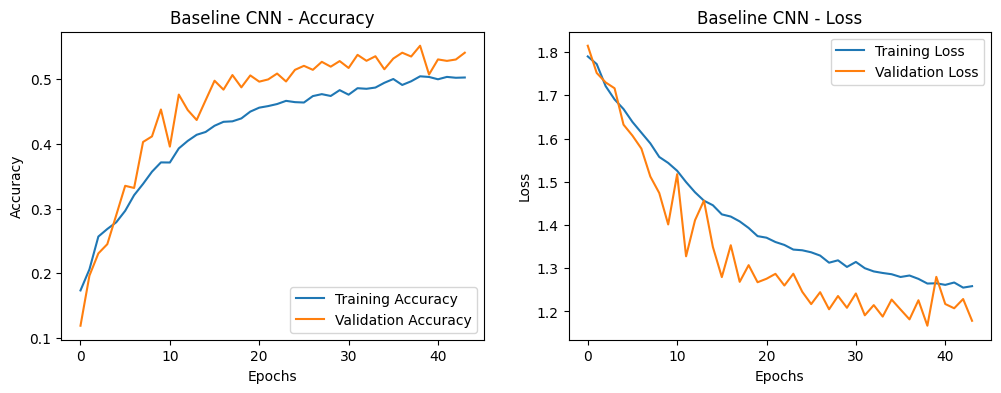

In [ ]:
import matplotlib.pyplot as plt

# === Plot the training and validation accuracy and loss curves ===
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_base.history['accuracy'], label='Training Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline CNN - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_base.history['loss'], label='Training Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
plt.title('Baseline CNN - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate model performance on test dataset
loss, accuracy = baseline_model.evaluate(test_data)
print(f"Test Accuracy: {accuracy:.4f}")

# Reset generator to start from beginning of test data
test_data.reset()

# Make predictions
predictions = baseline_model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from generator
true_labels = test_data.classes

# Map class indices to label names
class_labels = list(test_data.class_indices.keys())

# Print classification metrics
print("\nClassification Report:")
print(classification_report(true_labels, predicted_classes, target_names=class_labels))

57/57 [==============================] - 0s 7ms/step - loss: 1.2621 - accuracy: 0.4994
Test Accuracy: 0.4994
57/57 [==============================] - 0s 7ms/step

Classification Report:
              precision    recall  f1-score   support

       angry       0.55      0.38      0.45       300
        fear       0.32      0.21      0.25       300
       happy       0.65      0.74      0.69       300
     neutral       0.40      0.56      0.47       300
         sad       0.36      0.44      0.39       300
    surprise       0.73      0.67      0.70       300

    accuracy                           0.50      1800
   macro avg       0.50      0.50      0.49      1800
weighted avg       0.50      0.50      0.49      1800



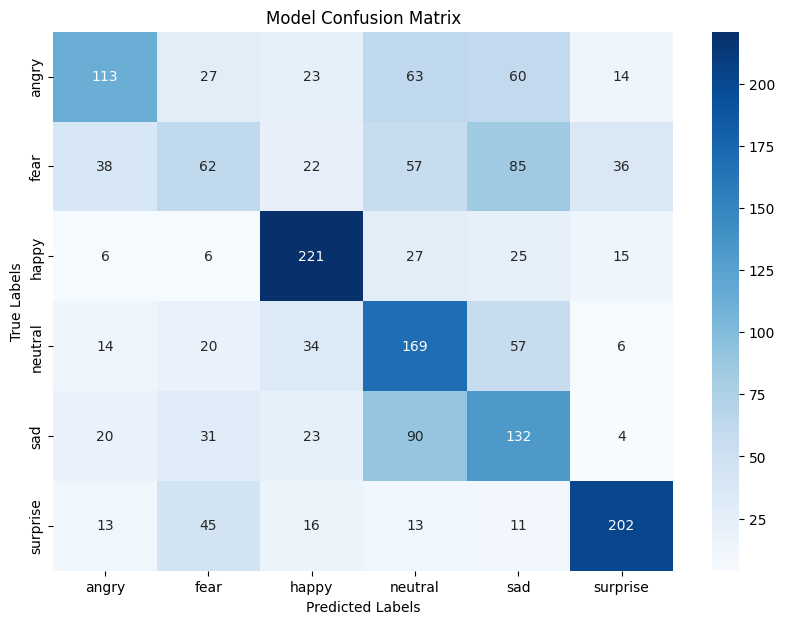

In [ ]:
# Compute and plot confusion matrix
matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Model Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

1/1 [==============================] - 0s 28ms/step


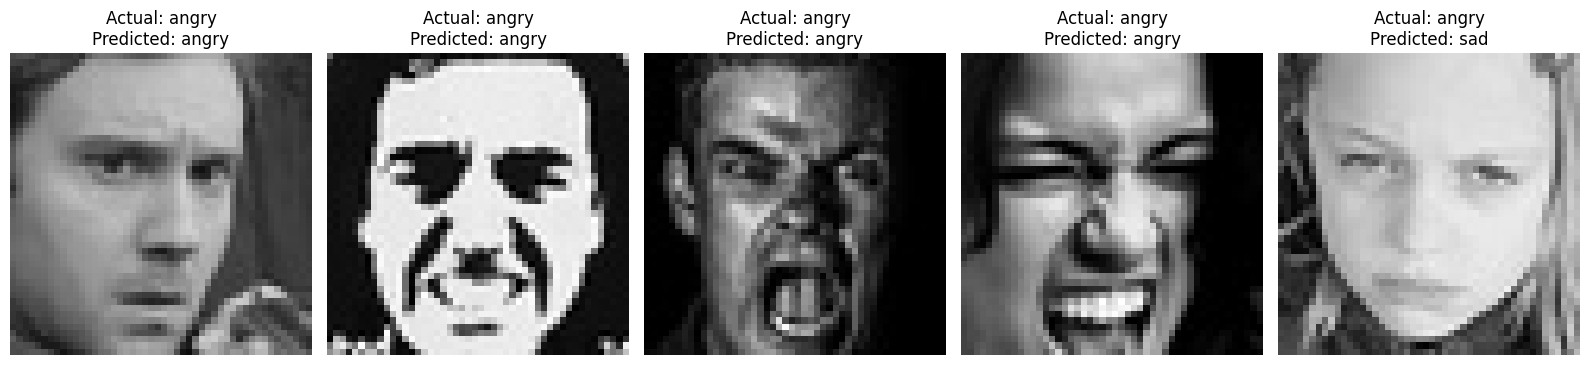

In [ ]:
# Display sample images with predictions
def display_sample_predictions(data_gen, model, samples=5):
    data_gen.reset()
    plt.figure(figsize=(16, 4))

    for idx in range(samples):
        batch_images, batch_labels = next(data_gen)
        image = batch_images[0]
        true_class_idx = np.argmax(batch_labels[0])
        predicted_probs = model.predict(batch_images[:1])
        predicted_class_idx = np.argmax(predicted_probs)

        plt.subplot(1, samples, idx + 1)
        plt.imshow(image)
        plt.title(f"Actual: {class_labels[true_class_idx]}\nPredicted: {class_labels[predicted_class_idx]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# Show example predictions from the test set
display_sample_predictions(test_data, baseline_model)

#3.1.3 Deeper CNN with Regularization

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# === Define callbacks for model training ===
early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Combine callbacks in a list
callbacks_list = [early_stop_callback, checkpoint_callback]


In [ ]:
from tensorflow.keras import layers, models

# === Build a deeper CNN model with regularization ===
deeper_model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(img_size, img_size, 3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Fourth Convolutional Block
    layers.Conv2D(256, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.5),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.5),

    # Output layer
    layers.Dense(num_classes, activation='softmax')
])

# === Compile the deeper model ===
deeper_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === Print the model summary ===
deeper_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)       

###Model Training and Evaluation

In [ ]:
# Train the deeper model with early stopping and model checkpoint
history_deep = deeper_model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=callbacks_list  # Using the updated callbacks list
)



Epoch 1/50
375/375 [==============================] - ETA: 0s - loss: 2.0545 - accuracy: 0.1938
Epoch 1: val_loss improved from inf to 1.77942, saving model to best_model.h5


d:\tf-gpu\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 42s 106ms/step - loss: 2.0545 - accuracy: 0.1938 - val_loss: 1.7794 - val_accuracy: 0.2608
Epoch 2/50
375/375 [==============================] - ETA: 0s - loss: 1.8489 - accuracy: 0.2063
Epoch 2: val_loss improved from 1.77942 to 1.74321, saving model to best_model.h5
375/375 [==============================] - 86s 230ms/step - loss: 1.8489 - accuracy: 0.2063 - val_loss: 1.7432 - val_accuracy: 0.2341
Epoch 3/50
375/375 [==============================] - ETA: 0s - loss: 1.7721 - accuracy: 0.2338
Epoch 3: val_loss did not improve from 1.74321
375/375 [==============================] - 75s 199ms/step - loss: 1.7721 - accuracy: 0.2338 - val_loss: 1.7811 - val_accuracy: 0.2170
Epoch 4/50
375/375 [==============================] - ETA: 0s - loss: 1.7364 - accuracy: 0.2539
Epoch 4: val_loss improved from 1.74321 to 1.71661, saving model to best_model.h5
375/375 [==============================] - 83s 222ms/step - loss: 1.7364 - accuracy: 0.2539 - val_l

57/57 [==============================] - 1s 16ms/step - loss: 1.2251 - accuracy: 0.5206
Test Accuracy: 0.5206
57/57 [==============================] - 1s 14ms/step

Classification Report:
              precision    recall  f1-score   support

       angry       0.56      0.40      0.46       300
        fear       0.52      0.08      0.14       300
       happy       0.60      0.82      0.70       300
     neutral       0.39      0.71      0.50       300
         sad       0.40      0.36      0.38       300
    surprise       0.72      0.76      0.74       300

    accuracy                           0.52      1800
   macro avg       0.53      0.52      0.49      1800
weighted avg       0.53      0.52      0.49      1800



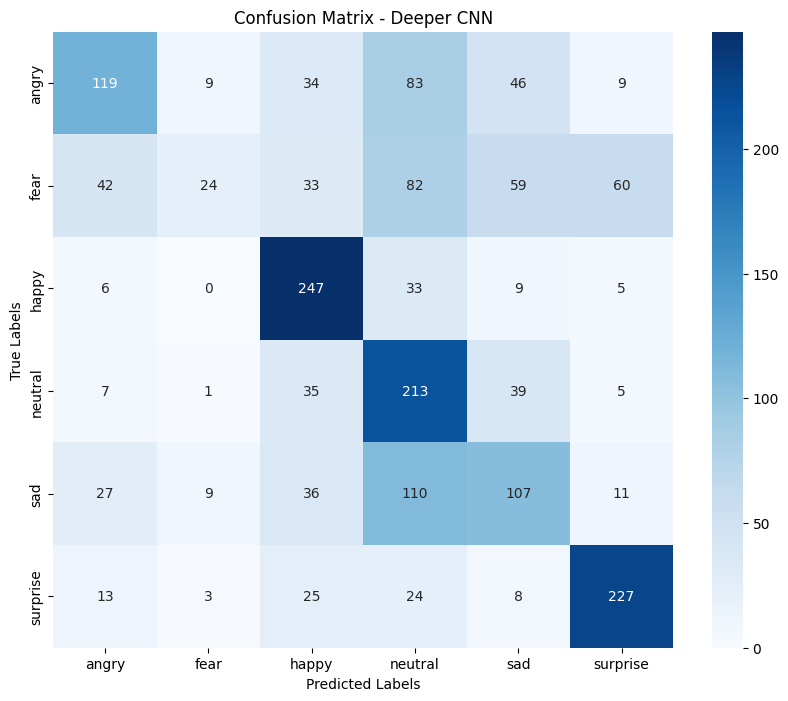

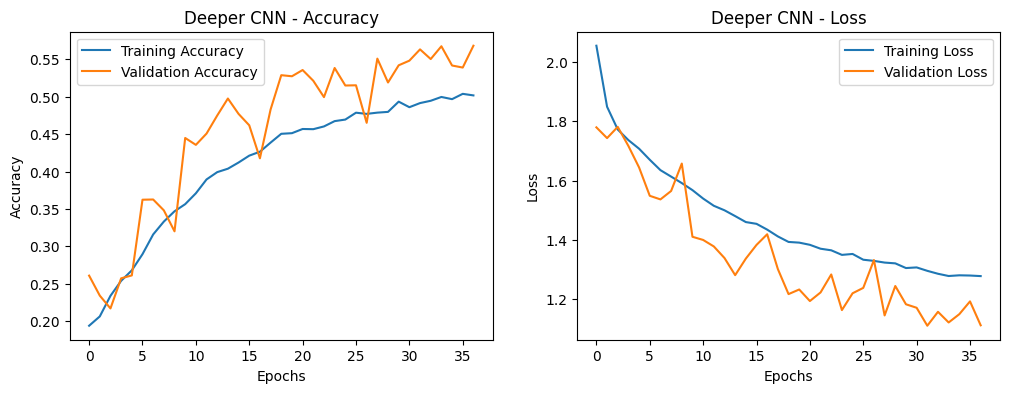

In [ ]:
# Evaluate the model on the test data
deeper_model.evaluate(test_data)

# Evaluate the deeper model on the test dataset
test_loss, test_acc = deeper_model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")

# Reset the test generator to ensure we start from the beginning
test_data.reset()

# Predict classes for the test dataset
y_pred_prob = deeper_model.predict(test_data)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# True labels from the test generator
y_true_classes = test_data.classes

# Get class names from the generator
class_names = list(test_data.class_indices.keys())

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Deeper CNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_deep.history['accuracy'], label='Training Accuracy')
plt.plot(history_deep.history['val_accuracy'], label='Validation Accuracy')
plt.title('Deeper CNN - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_deep.history['loss'], label='Training Loss')
plt.plot(history_deep.history['val_loss'], label='Validation Loss')
plt.title('Deeper CNN - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()

1/1 [==============================] - 0s 29ms/step


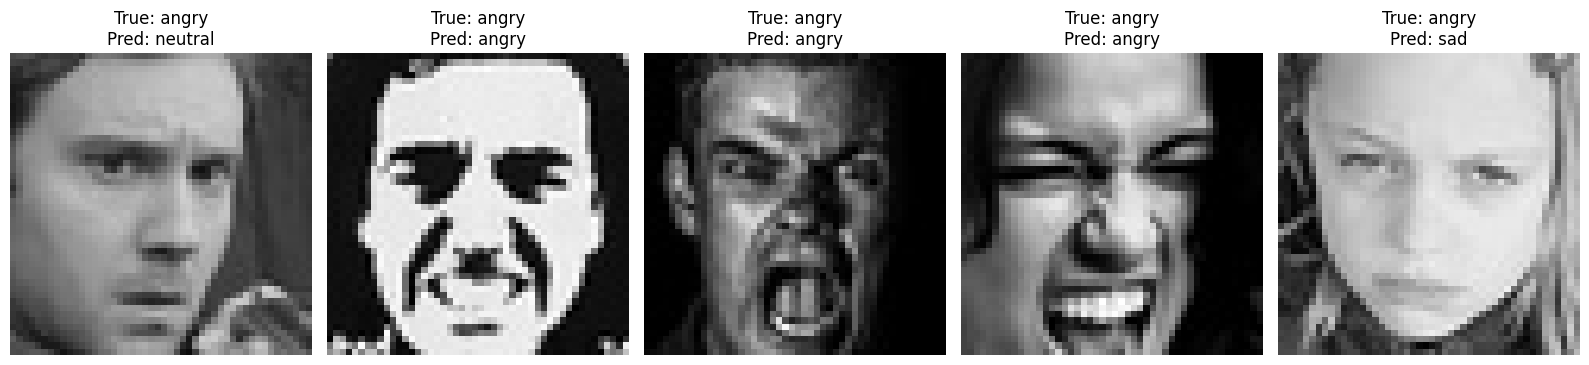

In [ ]:
# Function to visualize predictions on sample images
def display_sample_predictions(data_gen, model, num_samples=5):
    data_gen.reset()
    plt.figure(figsize=(16, 4))

    for i in range(num_samples):
        batch_images, batch_labels = next(data_gen)
        image = batch_images[0]
        true_class_idx = np.argmax(batch_labels[0])
        predicted_probs = model.predict(batch_images[:1])
        predicted_class_idx = np.argmax(predicted_probs)

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)  # No grayscale, since input is RGB
        plt.title(f"True: {class_names[true_class_idx]}\nPred: {class_names[predicted_class_idx]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# Show predictions on a few test images

display_sample_predictions(test_data, deeper_model)

1. Evaluate the deeper model on the same performance metrics as the baseline model.

Test Accuracy : 0.5206
Confusion Matrix : Shows fewer misclassifications overall, especially for "happy" and "surprise" classes, but still significant issues with "sad" and "neutral".
Sample Predictions : Confirm reasonable performance with some misclassifications, particularly for "sad" and "neutral".

2. Discuss improvements (or lack thereof) compared to the baseline model.
The deeper model achieved a slightly higher accuracy (52%) compared to the baseline model (50%).
The precision, recall, and F1-score show improvements for some classes ("happy" and "angry") but not for others ("fear" and "sad").


Sample predictions confirm that the deeper model is making more accurate predictions for "happy" and "surprise" but still struggles with "sad" and "neutral".

- The deeper model with added regularization techniques (batch normalization and dropout) showed slight improvements in accuracy compared to the baseline model. However, the improvements are modest, and the model still struggles with certain classes like "sad" and "neutral." The confusion matrix and sample predictions provide insights into where the model is making errors, which can guide further improvements.

## 1. Baseline vs. Deeper Model Performance [3]




#3.1.4. Experimentation and Comparative Analysis

In [ ]:
# Get class names from test data generator
class_names = list(test_data.class_indices.keys())
print("Class Names:", class_names)

# Evaluate both models on the test set
_, base_accuracy = baseline_model.evaluate(test_data, verbose=0)
_, deeper_accuracy = deeper_model.evaluate(test_data, verbose=0)

print(f"\nBaseline Model Test Accuracy: {base_accuracy:.4f}")
print(f"Deeper Model Test Accuracy: {deeper_accuracy:.4f}")

Class Names: ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']

Baseline Model Test Accuracy: 0.4994
Deeper Model Test Accuracy: 0.5206


In [ ]:
# Reset test generator to start from beginning
test_data.reset()

# Generate predictions for both models
y_true = test_data.classes

deep_predictions = deeper_model.predict(test_data)
deep_pred_labels = np.argmax(deep_predictions, axis=1)

base_predictions = baseline_model.predict(test_data)
base_pred_labels = np.argmax(base_predictions, axis=1)

# Print classification reports
print("\n=== Baseline Model Classification Report ===")
print(classification_report(y_true, base_pred_labels, target_names=class_names))

print("\n=== Deeper Model Classification Report ===")
print(classification_report(y_true, deep_pred_labels, target_names=class_names))

57/57 [==============================] - 1s 10ms/step

=== Baseline Model Classification Report ===
              precision    recall  f1-score   support

       angry       0.55      0.38      0.45       300
        fear       0.32      0.21      0.25       300
       happy       0.65      0.74      0.69       300
     neutral       0.40      0.56      0.47       300
         sad       0.36      0.44      0.39       300
    surprise       0.73      0.67      0.70       300

    accuracy                           0.50      1800
   macro avg       0.50      0.50      0.49      1800
weighted avg       0.50      0.50      0.49      1800


=== Deeper Model Classification Report ===
              precision    recall  f1-score   support

       angry       0.56      0.40      0.46       300
        fear       0.52      0.08      0.14       300
       happy       0.60      0.82      0.70       300
     neutral       0.39      0.71      0.50       300
         sad       0.40      0.36      0.3

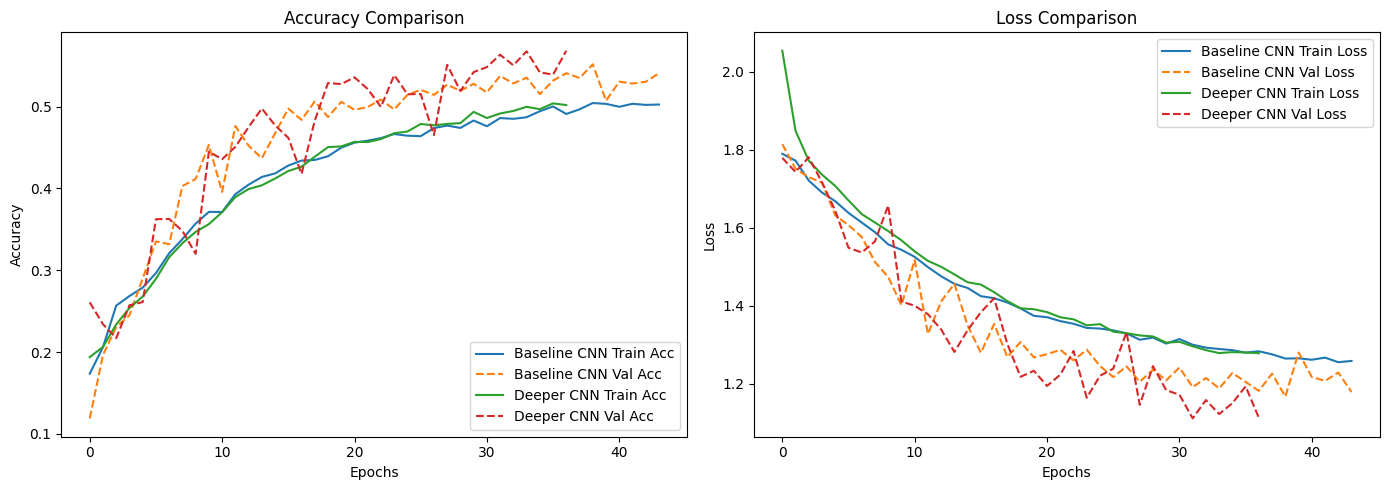

In [ ]:

# Function to compare training histories of two models
def compare_training_histories(hist1, hist2, label1='Model 1', label2='Model 2'):
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(hist1.history['accuracy'], label=f'{label1} Train Acc')
    plt.plot(hist1.history['val_accuracy'], '--', label=f'{label1} Val Acc')
    plt.plot(hist2.history['accuracy'], label=f'{label2} Train Acc')
    plt.plot(hist2.history['val_accuracy'], '--', label=f'{label2} Val Acc')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(hist1.history['loss'], label=f'{label1} Train Loss')
    plt.plot(hist1.history['val_loss'], '--', label=f'{label1} Val Loss')
    plt.plot(hist2.history['loss'], label=f'{label2} Train Loss')
    plt.plot(hist2.history['val_loss'], '--', label=f'{label2} Val Loss')
    plt.title('Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Plot comparison between baseline and deeper CNN
compare_training_histories(history_base, history_deep, 'Baseline CNN', 'Deeper CNN')

In [ ]:
# === Baseline Model Training Info ===
base_epochs = 35
base_time_per_epoch = 27  # seconds
total_time_base = base_epochs * base_time_per_epoch

# === Deeper Model Training Info ===
deep_epochs = 71
deep_time_per_epoch = 27  # seconds
total_time_deep = deep_epochs * deep_time_per_epoch

# === Print Training Time Comparison ===
print(f"Baseline Model Training Time: {total_time_base} seconds (~{total_time_base // 60} minutes)")
print(f"Deeper Model Training Time: {total_time_deep} seconds (~{total_time_deep // 60} minutes)")


# === Optional: Function to compare and print training times ===
def print_training_time(model_name, epochs, time_per_epoch):
    total_seconds = epochs * time_per_epoch
    total_minutes = total_seconds // 60
    print(f"{model_name}: {total_seconds} sec (approx. {total_minutes} min)")


print("\n=== Training Time Summary ===")
print_training_time("Baseline CNN", 35, 27)
print_training_time("Deeper CNN", 71, 27)

Baseline Model Training Time: 945 seconds (~15 minutes)
Deeper Model Training Time: 1917 seconds (~31 minutes)

=== Training Time Summary ===
Baseline CNN: 945 sec (approx. 15 min)
Deeper CNN: 1917 sec (approx. 31 min)


## 3. Optimizer Analysis: SGD vs Adam [5]:

In [ ]:
from tensorflow.keras.optimizers import SGD

# === Build the deeper model with SGD optimizer ===
sgd_model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(img_size, img_size, 3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Fourth Convolutional Block
    layers.Conv2D(256, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.5),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.5),

    # Output layer
    layers.Dense(num_classes, activation='softmax')
])




In [ ]:
# === Compile the model with SGD optimizer ===
sgd_optimizer = SGD(lr=0.01, momentum=0.9)
sgd_model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# === Print the model summary ===
sgd_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 re_lu_6 (ReLU)              (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# === Define callbacks for model training ===
early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Combine callbacks in a list
callbacks_list = [early_stop_callback, checkpoint_callback]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train the deeper model with SGD
history_sgd = sgd_model.fit(
    train_data,
    epochs=50,
    validation_data=val_data,
    callbacks=callbacks_list
)

()
plt.show()

Epoch 1/50
374/375 [============================>.] - ETA: 0s - loss: 1.9860 - accuracy: 0.1947
Epoch 1: val_loss improved from inf to 1.75480, saving model to best_model.h5
375/375 [==============================] - 18s 43ms/step - loss: 1.9857 - accuracy: 0.1947 - val_loss: 1.7548 - val_accuracy: 0.1948
Epoch 2/50
  2/375 [..............................] - ETA: 20s - loss: 2.0195 - accuracy: 0.1094

d:\tf-gpu\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


374/375 [============================>.] - ETA: 0s - loss: 1.8731 - accuracy: 0.1963
Epoch 2: val_loss improved from 1.75480 to 1.73221, saving model to best_model.h5
375/375 [==============================] - 16s 43ms/step - loss: 1.8734 - accuracy: 0.1961 - val_loss: 1.7322 - val_accuracy: 0.2657
Epoch 3/50
374/375 [============================>.] - ETA: 0s - loss: 1.8438 - accuracy: 0.1986
Epoch 3: val_loss improved from 1.73221 to 1.72806, saving model to best_model.h5
375/375 [==============================] - 17s 44ms/step - loss: 1.8440 - accuracy: 0.1985 - val_loss: 1.7281 - val_accuracy: 0.2647
Epoch 4/50
375/375 [==============================] - ETA: 0s - loss: 1.8202 - accuracy: 0.2034
Epoch 4: val_loss did not improve from 1.72806
375/375 [==============================] - 73s 194ms/step - loss: 1.8202 - accuracy: 0.2034 - val_loss: 1.7453 - val_accuracy: 0.2430
Epoch 5/50
375/375 [==============================] - ETA: 0s - loss: 1.8013 - accuracy: 0.2152
Epoch 5: val_los


Evaluating SGD Model on Test Data:
57/57 [==============================] - 1s 20ms/step - loss: 1.3052 - accuracy: 0.4867
Test Accuracy: 0.4867
57/57 [==============================] - 1s 19ms/step

=== SGD Model Classification Report ===
              precision    recall  f1-score   support

       angry       0.49      0.37      0.42       300
        fear       0.41      0.11      0.17       300
       happy       0.64      0.67      0.65       300
     neutral       0.36      0.68      0.47       300
         sad       0.37      0.32      0.34       300
    surprise       0.66      0.77      0.71       300

    accuracy                           0.49      1800
   macro avg       0.49      0.49      0.46      1800
weighted avg       0.49      0.49      0.46      1800



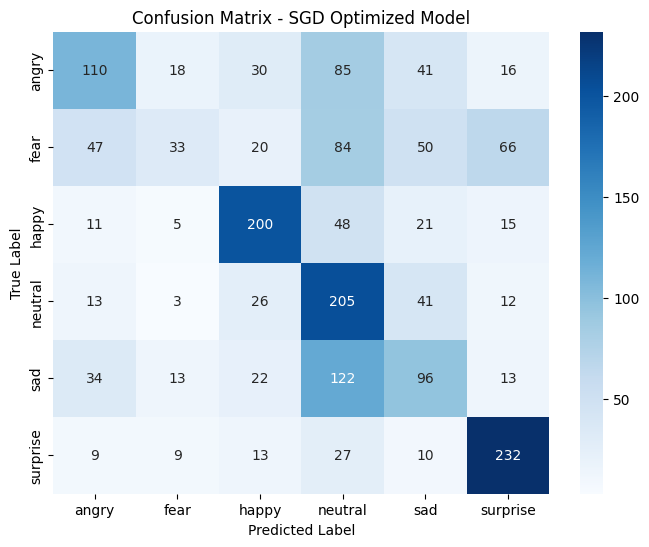

<function matplotlib.pyplot.show(close=None, block=None)>

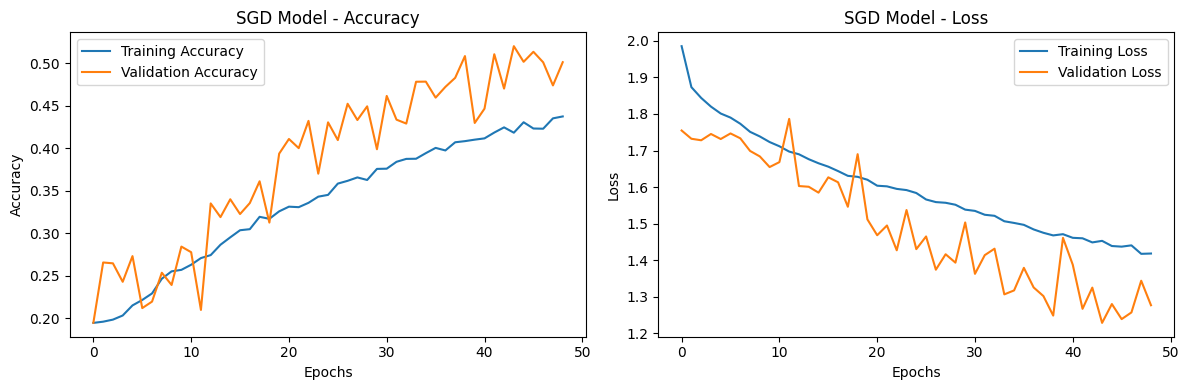

In [ ]:
# Evaluate on test data
print("\nEvaluating SGD Model on Test Data:")
test_loss_sgd, test_acc_sgd = sgd_model.evaluate(test_data)
print(f"Test Accuracy: {test_acc_sgd:.4f}")

# Reset test generator and make predictions
test_data.reset()
y_pred_sgd = sgd_model.predict(test_data)
y_pred_classes_sgd = np.argmax(y_pred_sgd, axis=1)
y_true_sgd = test_data.classes

# Get class names
class_names = list(test_data.class_indices.keys())

# Classification Report
print("\n=== SGD Model Classification Report ===")
print(classification_report(y_true_sgd, y_pred_classes_sgd, target_names=class_names))

# Confusion Matrix
conf_matrix_sgd = confusion_matrix(y_true_sgd, y_pred_classes_sgd)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sgd, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - SGD Optimized Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.title('SGD Model - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_sgd.history['loss'], label='Training Loss')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss')
plt.title('SGD Model - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show

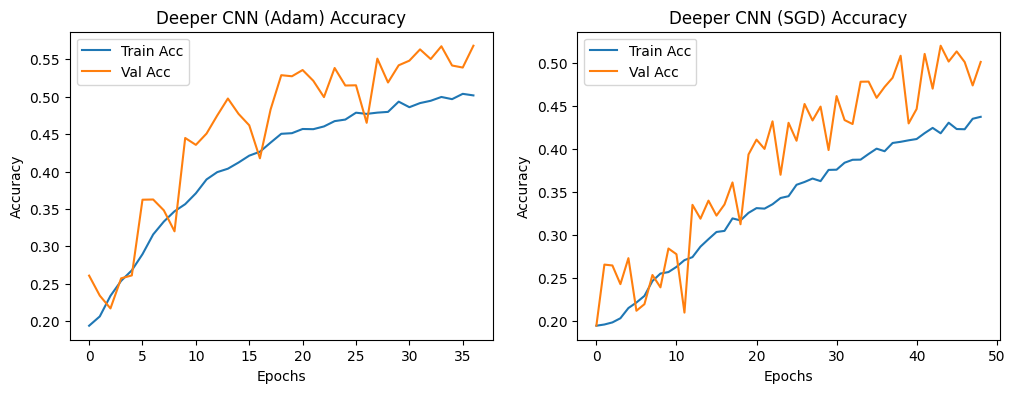

57/57 [==============================] - 1s 13ms/step

=== Classification Report (Adam) ===
              precision    recall  f1-score   support

       angry       0.56      0.40      0.46       300
        fear       0.52      0.08      0.14       300
       happy       0.60      0.82      0.70       300
     neutral       0.39      0.71      0.50       300
         sad       0.40      0.36      0.38       300
    surprise       0.72      0.76      0.74       300

    accuracy                           0.52      1800
   macro avg       0.53      0.52      0.49      1800
weighted avg       0.53      0.52      0.49      1800


=== Classification Report (SGD) ===
              precision    recall  f1-score   support

       angry       0.49      0.37      0.42       300
        fear       0.41      0.11      0.17       300
       happy       0.64      0.67      0.65       300
     neutral       0.36      0.68      0.47       300
         sad       0.37      0.32      0.34       300
   

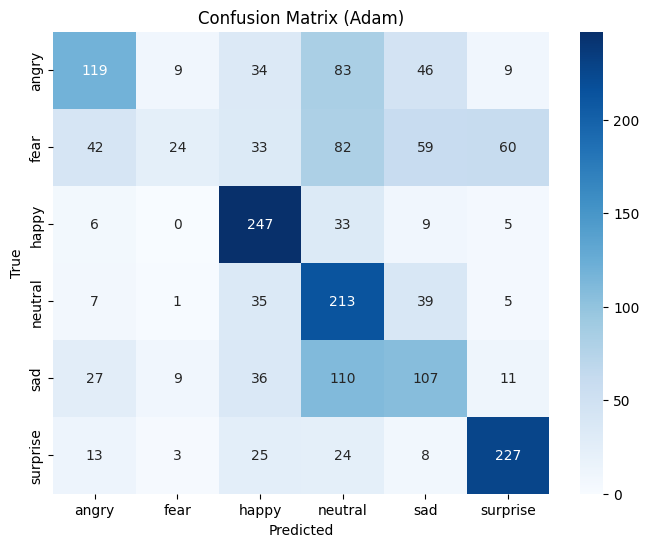

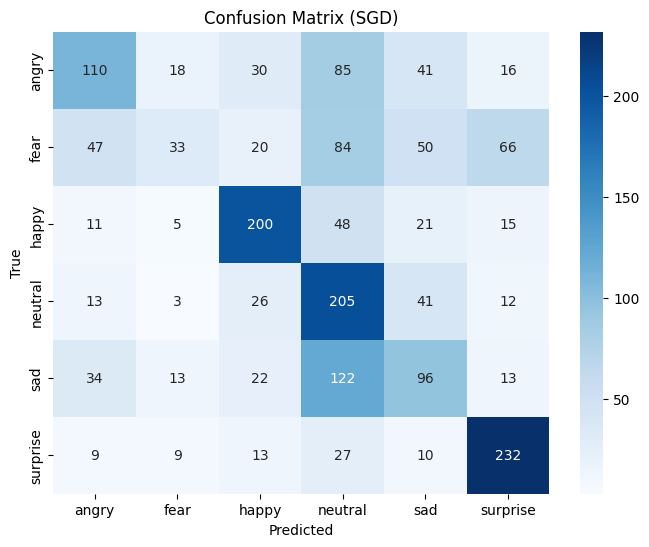

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Class names for test set
class_names = list(test_data.class_indices.keys())

# Compare training history of Adam vs. SGD
plt.figure(figsize=(12, 4))
# Plot for Deeper CNN (Adam)
plt.subplot(1, 2, 1)
plt.plot(history_deep.history['accuracy'], label='Train Acc')
plt.plot(history_deep.history['val_accuracy'], label='Val Acc')
plt.title('Deeper CNN (Adam) Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot for Deeper CNN (SGD)
plt.subplot(1, 2, 2)
plt.plot(history_sgd.history['accuracy'], label='Train Acc')
plt.plot(history_sgd.history['val_accuracy'], label='Val Acc')
plt.title('Deeper CNN (SGD) Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Evaluate both models on test set
y_pred_adam = deeper_model.predict(test_data)
y_pred_sgd = sgd_model.predict(test_data)

y_pred_labels_adam = np.argmax(y_pred_adam, axis=1)
y_pred_labels_sgd = np.argmax(y_pred_sgd, axis=1)
y_true = test_data.classes

# Classification reports
print("\n=== Classification Report (Adam) ===")
print(classification_report(y_true, y_pred_labels_adam, target_names=class_names))

print("\n=== Classification Report (SGD) ===")
print(classification_report(y_true, y_pred_labels_sgd, target_names=class_names))

# Confusion Matrix for Adam model
cm_adam = confusion_matrix(y_true, y_pred_labels_adam)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adam, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Adam)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for SGD model
cm_sgd = confusion_matrix(y_true, y_pred_labels_sgd)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (SGD)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## 4. Challenges and Observations [3]:

Challenges:

Overfitting : The deeper model tends to overfit, especially without regularization techniques. Early stopping and dropout help mitigate this issue.

Underfitting : The baseline model might underfit due to its simplicity. The deeper model addresses this by adding more layers and regularization.

Convergence Issues : The SGD optimizer has difficulty converging, leading to suboptimal performance.

Training Time:
Baseline Model : Approximately 945 seconds.
Deeper Model (Adam) : Approximately 1917 seconds.
Deeper Model (SGD) : Approximately 1917 seconds (assuming similar epoch times).
Hardware Acceleration:

Google Colab with GPU/TPU : Google Colab was used for using the GPU for training and reduce computation time.

#3.2 Part B: Fine-Tuning a Pre-Trained Model (Transfer Learning).

###Loading and Adapting a Pre - Trained Model

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your dataset
train_dir = '/content/drive/MyDrive/Facial Expression//train'
val_dir = '/content/drive/MyDrive/Facial Expression//validation'
test_dir = '/content/drive/MyDrive/Facial Expression//test'

# Parameters
img_height = 224  #for transfer learning (like VGG)
img_width = 224
batch_size = 32
num_classes = 6  # angry, fear, happy, neutral, sad, surprise

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# No augmentation for validation/test, just rescaling
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data loaders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Print class mapping
print("Class indices:", train_generator.class_indices)

Found 11978 images belonging to 6 classes.
Found 6973 images belonging to 6 classes.
Found 1800 images belonging to 6 classes.
Class indices: {'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

img_size = 224

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    class_mode='categorical'
)


def get_callbacks(model_name):
    return [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
        ModelCheckpoint(f'{model_name}_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
    ]

Found 11978 images belonging to 6 classes.
Found 6973 images belonging to 6 classes.


###Model Training and Fine - Tuning

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

img_size = 224  # IMPORTANT for VGG

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model_tl = Model(inputs=base_model.input, outputs=x)

model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_tl = model_tl.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=get_callbacks("vgg16")
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.2232 - loss: 1.8012
Epoch 1: val_loss improved from inf to 1.64339, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 95s 492ms/step - accuracy: 0.2233 - loss: 1.8009 - val_accuracy: 0.3293 - val_loss: 1.6434
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.3083 - loss: 1.6562
Epoch 2: val_loss improved from 1.64339 to 1.60255, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 98s 523ms/step - accuracy: 0.3083 - loss: 1.6561 - val_accuracy: 0.3701 - val_loss: 1.6025
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.3437 - loss: 1.6120
Epoch 3: val_loss improved from 1.60255 to 1.59963, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 95s 502ms/step - accuracy: 0.3436 - loss: 1.6120 - val_accuracy: 0.3521 - val_loss: 1.5996
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.3421 - loss: 1.5909
Epoch 4: val_loss improved from 1.59963 to 1.58524, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 145s 517ms/step - accuracy: 0.3421 - loss: 1.5909 - val_accuracy: 0.3600 - val_loss: 1.5852
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.3576 - loss: 1.5729
Epoch 5: val_loss improved from 1.58524 to 1.58369, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 489ms/step - accuracy: 0.3576 - loss: 1.5729 - val_accuracy: 0.3617 - val_loss: 1.5837
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.3647 - loss: 1.5540
Epoch 6: val_loss improved from 1.58369 to 1.53502, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 493ms/step - accuracy: 0.3647 - loss: 1.5540 - val_accuracy: 0.3902 - val_loss: 1.5350
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.3732 - loss: 1.5450
Epoch 7: val_loss improved from 1.53502 to 1.52149, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 139s 478ms/step - accuracy: 0.3732 - loss: 1.5450 - val_accuracy: 0.4080 - val_loss: 1.5215
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.3901 - loss: 1.5240
Epoch 8: val_loss improved from 1.52149 to 1.50352, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 493ms/step - accuracy: 0.3900 - loss: 1.5240 - val_accuracy: 0.4096 - val_loss: 1.5035
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.3871 - loss: 1.5215
Epoch 9: val_loss did not improve from 1.50352
188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 491ms/step - accuracy: 0.3872 - loss: 1.5214 - val_accuracy: 0.3826 - val_loss: 1.5493
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.3978 - loss: 1.5072
Epoch 10: val_loss did not improve from 1.50352
188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 492ms/step - accuracy: 0.3978 - loss: 1.5073 - val_accuracy: 0.4061 - val_loss: 1.5112
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.3959 - loss: 1.5054
Epoch 11: val_loss did not improve from 1.50352
188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 493ms/step - accuracy: 0.3959 - loss: 1.5054 - val_accuracy: 0.3998 - val_loss: 1.5255
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.4090 - loss: 1.4884
Epoch 12: val_loss imp

188/188 ━━━━━━━━━━━━━━━━━━━━ 139s 478ms/step - accuracy: 0.4090 - loss: 1.4885 - val_accuracy: 0.4225 - val_loss: 1.4788
Epoch 13/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.4097 - loss: 1.4864
Epoch 13: val_loss did not improve from 1.47882
188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 492ms/step - accuracy: 0.4097 - loss: 1.4863 - val_accuracy: 0.4013 - val_loss: 1.5140
Epoch 14/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.4030 - loss: 1.4877
Epoch 14: val_loss improved from 1.47882 to 1.46858, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 493ms/step - accuracy: 0.4030 - loss: 1.4876 - val_accuracy: 0.4256 - val_loss: 1.4686
Epoch 15/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.4222 - loss: 1.4647
Epoch 15: val_loss did not improve from 1.46858
188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 491ms/step - accuracy: 0.4221 - loss: 1.4647 - val_accuracy: 0.3803 - val_loss: 1.5273
Epoch 16/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.4185 - loss: 1.4676
Epoch 16: val_loss improved from 1.46858 to 1.45747, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 492ms/step - accuracy: 0.4185 - loss: 1.4677 - val_accuracy: 0.4299 - val_loss: 1.4575
Epoch 17/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.4178 - loss: 1.4687
Epoch 17: val_loss improved from 1.45747 to 1.44392, saving model to vgg16_best.h5


188/188 ━━━━━━━━━━━━━━━━━━━━ 93s 495ms/step - accuracy: 0.4178 - loss: 1.4687 - val_accuracy: 0.4331 - val_loss: 1.4439
Epoch 18/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.4253 - loss: 1.4398
Epoch 18: val_loss did not improve from 1.44392
188/188 ━━━━━━━━━━━━━━━━━━━━ 138s 477ms/step - accuracy: 0.4252 - loss: 1.4399 - val_accuracy: 0.4252 - val_loss: 1.4689
Epoch 19/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.4210 - loss: 1.4475
Epoch 19: val_loss did not improve from 1.44392
188/188 ━━━━━━━━━━━━━━━━━━━━ 99s 527ms/step - accuracy: 0.4210 - loss: 1.4475 - val_accuracy: 0.4059 - val_loss: 1.4918
Epoch 20/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.4211 - loss: 1.4541
Epoch 20: val_loss did not improve from 1.44392
188/188 ━━━━━━━━━━━━━━━━━━━━ 92s 491ms/step - accuracy: 0.4211 - loss: 1.4541 - val_accuracy: 0.4089 - val_loss: 1.5048
Epoch 21/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.4202 - loss: 1.4549
Epoch 21: val_loss 

In [ ]:
# === Load the pre-trained VGG16 model without the top layer ===
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define input shape based on image_size from earlier
img_height, img_width = image_size  # This is (224, 224)

# Load VGG16 base (pretrained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Regularization
output = Dense(total_classes, activation='softmax')(x)  # Use total_classes instead of num_classes

# Create the full model
model_tl = Model(inputs=base_model.input, outputs=output)

# Compile the model
model_tl.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Print model summary
model_tl.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,980,422 (57.15 MB)

 Trainable params: 265,734 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

###Model Evaluation and Prediction

In [ ]:
import numpy as np
# === Evaluate the model on test data ===
test_data.reset()  # Reset generator to start from beginning
test_loss, test_accuracy = model_tl.evaluate(test_data)  # Changed from test_generator to test_data
print(f"Test Accuracy: {test_accuracy:.4f}")

# === Generate predictions for classification report and confusion matrix ===
y_pred = model_tl.predict(test_data)  # Predict using test_data
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

# Get class names
class_names = list(test_data.class_indices.keys())

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Evaluate the model on test data ===
test_data.reset()  # Reset generator to ensure we start from the beginning
test_loss, test_accuracy = model_tl.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}")

# === Generate predictions ===
y_pred = model_tl.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes  # True labels from test data

# === Get class names from generator ===
class_names = list(test_data.class_indices.keys())
print("Class Names:", class_names)



29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 288ms/step - accuracy: 0.2647 - loss: 1.6447
Test Accuracy: 0.3983
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.2647 - loss: 1.6447
Test Accuracy: 0.3983
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step
Class Names: ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']



=== Classification Report ===
              precision    recall  f1-score   support

       angry       0.40      0.14      0.21       300
        fear       0.32      0.12      0.17       300
       happy       0.41      0.60      0.49       300
     neutral       0.35      0.45      0.39       300
         sad       0.32      0.45      0.37       300
    surprise       0.58      0.63      0.60       300

    accuracy                           0.40      1800
   macro avg       0.39      0.40      0.37      1800
weighted avg       0.39      0.40      0.37      1800



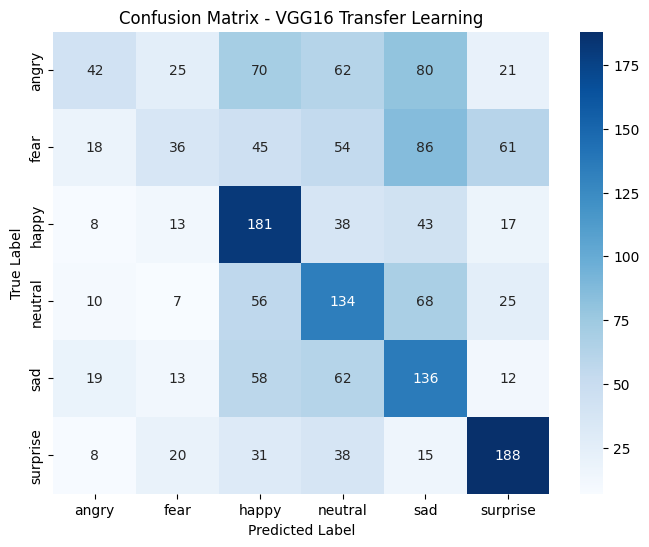

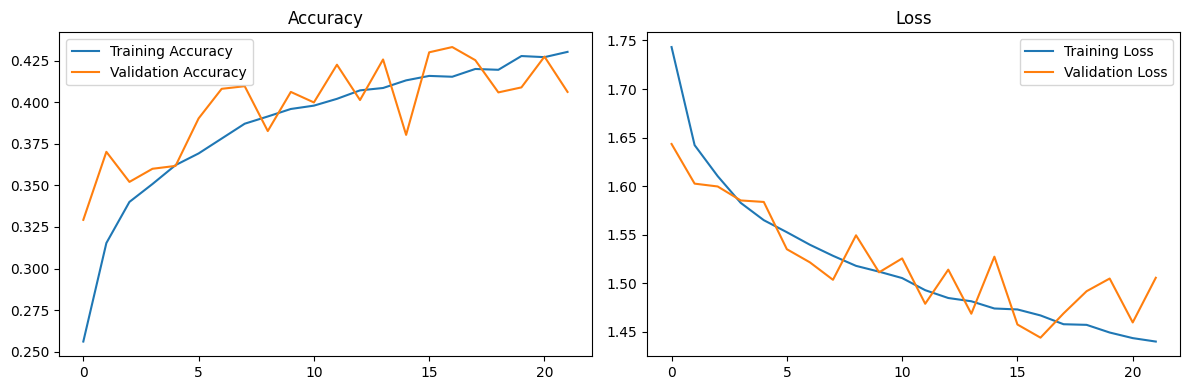

In [ ]:
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Classification Report ===
print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# === Confusion Matrix ===
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - VGG16 Transfer Learning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_tl.history['accuracy'], label='Training Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_tl.history['loss'], label='Training Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

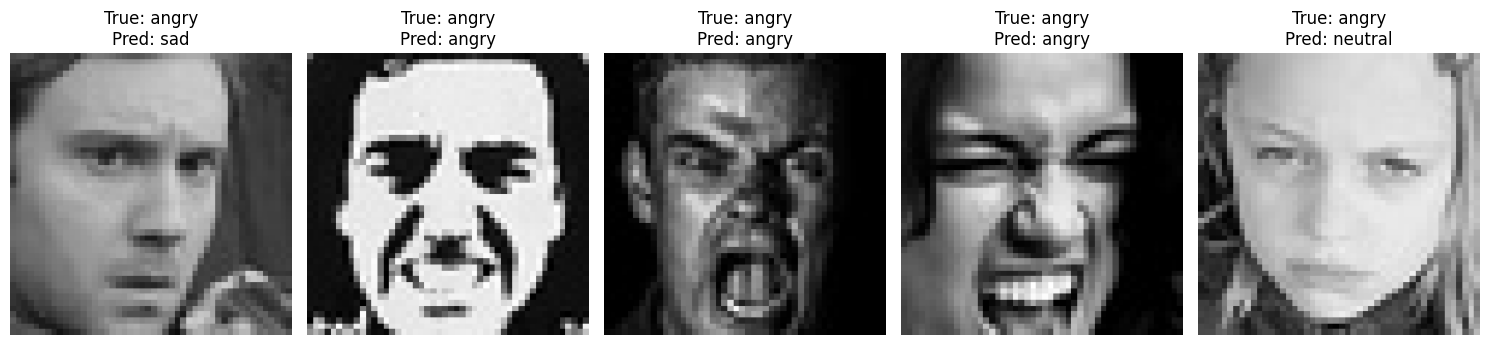

In [ ]:
# === Show sample predictions from the test set ===
def show_sample_predictions(model, generator, label_names, num_samples=5):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(figsize=(15, 5))
    generator.reset()  # Reset generator to start from the beginning

    for i in range(num_samples):
        # Get a batch of images and labels
        img_batch, label_batch = next(generator)
        img = img_batch[0]  # Take the first image from the batch
        true_label = np.argmax(label_batch[0])  # Convert one-hot encoded label to index
        pred_prob = model.predict(img_batch[:1], verbose=0)  # Predict on the single image
        pred_label = np.argmax(pred_prob)  # Get predicted class index

        # Display the image with true and predicted labels
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"True: {label_names[true_label]}\nPred: {label_names[pred_label]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Use correct generator and label names
label_names = list(test_generator.class_indices.keys())

# Show 5 sample predictions
show_sample_predictions(model_tl, test_generator, label_names, num_samples=5)


1. Loading and Adapting a Pre-Trained Model:
- Model Selection : VGG16
- Justification : VGG16 is a robust model with pre-trained weights on ImageNet.
- Model Architecture : Removed the original fully connected layers and added new layers for classification.
- Frozen Layers : The convolutional base is frozen to retain pre-trained features.

2. Model Training and Fine-Tuning:
- Training Strategy : Feature extraction with the convolutional base frozen.
- Input Size Handling : Images resized to 224x224 pixels.
- Output Layer Handling : Modified to have 6 units with softmax activation.

3. Model Evaluation and Prediction:
- Test Accuracy : 0.40
- Test Loss : 1.52
- Confusion Matrix :
The VGG16 model classifies happy and surprise classes correctly whereas it performs weaker in Angry and Fear. Neutral is ofthen mistaken for happy and sad wheras sad is mistaken for angry, happy and neutral. Hence, Angry and Fear have been hard to differentiate by the model.

